# Sentiment Classification with pretrained Models

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Load Lyrics Data

In [2]:
lyrics = pd.concat(map(pd.read_csv, ['data/lyrics_rishabh.csv', 'data/lyrics_robin.csv', 'data/lyrics_bennet.csv']), ignore_index=True)

# Data Cleaning

In [3]:
lyrics = lyrics.drop_duplicates(subset=['track_uri'], keep='first')

In [4]:
lyrics.loc[lyrics.lyrics == 'Lyrics not found', 'lyrics'].count()

2764

In [5]:
lyrics = lyrics.drop(lyrics[lyrics.lyrics == 'Lyrics not found'].index)

In [6]:
lyrics.loc[lyrics.lyrics.isna()==True]

,track_uri,artist_name,track_name,lyrics
22244,spotify:track:0cELvuwJW1acISUHYB6suj,Mariah Carey,Emotions,NaN


In [7]:
lyrics = lyrics.drop(lyrics[lyrics.lyrics == 'Error fetching lyrics'].index)

In [8]:
lyrics.lyrics.fillna("""Youve got me feeling emotions
Deeper than Ive ever dreamed of
Youve got me feeling emotions
Higher than the heavens above
I feel good, I feel nice
Ive never felt so satisfied
Im in love, Im alive
Intoxicated, flying high
It feels like a dream
When you touch me tenderly
I dont know if its real
But I like the way I feel inside
Youve got me feeling emotions
Deeper than Ive ever dreamed of
Youve got me feeling emotions
Higher than the heavens above
In the morning when I rise
You are the first thing on my mind
And in the middle of the night
I feel your heartbeat next to mine
It feels like a dream
When you love me tenderly
I dont know if youre for real
But I like the way I feel inside
Youve got me feeling emotions
Deeper than Ive ever dreamed of
Youve got me feeling emotions
Higher than the heavens above
Youve got me feeling emotions
Deeper than Ive ever dreamed of
Youve got me feeling emotions
Higher than the heavens above
You know the way to make me lose control
When youre looking into my eyes
You make me feel so high
Oh, oh, baby (Oh, baby)
Alright, alright, alrigh (Ah-ah) Ooh, ooh, hey, hey (Ah) Oh-oh-oh-oh Youve got me feeling emotions Deeper than Ive ever dreamed of Youve got me feeling emotions Higher than the heavens above Youve got me feeling emotions Deeper than Ive ever dreamed of Youve got me feeling emotions Higher than the heavens above""", inplace=True)

In [9]:
# Replace newline characters ('\n') with spaces in the 'lyrics' column
lyrics['lyrics'] = lyrics['lyrics'].str.replace('\n', ' ')

In [10]:
lyrics.loc[lyrics['track_name'] == 'Emotions']

,track_uri,artist_name,track_name,lyrics
14029,spotify:track:0hjIg7q5bUmeNfFlr95g9o,H-Town,Emotions,8 ContributorsEmotions Lyrics Emotions Make Yo...
19135,spotify:track:2wqSycuLuGlQgzV1aA6Myu,H-Town,Emotions,8 ContributorsEmotions Lyrics Emotions Make Yo...
22244,spotify:track:0cELvuwJW1acISUHYB6suj,Mariah Carey,Emotions,Youve got me feeling emotions Deeper than Ive ...


In [11]:
def clean_lyrics(lyrics_text):
    # Find the index of the first occurrence of Lyrics and the last occurence of Embed
    start_index = lyrics_text.find('Lyrics')
    end_index = lyrics_text.rfind('Embed')

    # Check if 'Lyrics' and 'Embed' are found
    if start_index != -1 and end_index != -1:
        # Extract the substring between 'Lyrics' and 'Embed' (excluding 'Embed')
        cleaned_lyrics = lyrics_text[start_index+len('Lyrics'):end_index].strip()
        return cleaned_lyrics
    else:
        # Return the original lyrics if 'Lyrics' or 'Embed' is not found
        return lyrics_text


In [12]:
def remove_trailing_number(lyrics_text):
    # Define a regular expression pattern to match the trailing number
    pattern = r'\d+$'
    # Use re.sub() to remove the trailing number
    cleaned_lyrics = re.sub(pattern, '', lyrics_text).strip()
    return cleaned_lyrics

# Apply the remove_trailing_number function to the 'lyrics' column
lyrics['lyrics'] = lyrics['lyrics'].apply(remove_trailing_number)

In [13]:
# Apply the clean_lyrics function to the 'lyrics' column
lyrics['lyrics'] = lyrics['lyrics'].apply(clean_lyrics)
# Apply the remove_trailing_number function to the 'lyrics' column
lyrics['lyrics'] = lyrics['lyrics'].apply(remove_trailing_number)


# Part that is not cleaned yet
### See *artist* LiveGet tickets as low as $29You might also like

### Mean Value for word count

* Count Number of Words in Lyrics
* Turn the Count in a seperate Column
* Print a scatter plot for word count for each individual track
* also do statistics on it

In [14]:
def count_words(text):
    return len(str(text).split())

In [15]:
lyrics['word_count'] = lyrics['lyrics'].apply(count_words)

In [16]:
lyrics.word_count.describe()

count     62494.000000
mean       1049.759497
std        6788.374923
min           0.000000
25%         221.000000
50%         307.000000
75%         454.000000
max      149171.000000
Name: word_count, dtype: float64

# EDA with Duration - Join information from the challenge Dataset
MOre Data Cleaning - Getting rid of first line

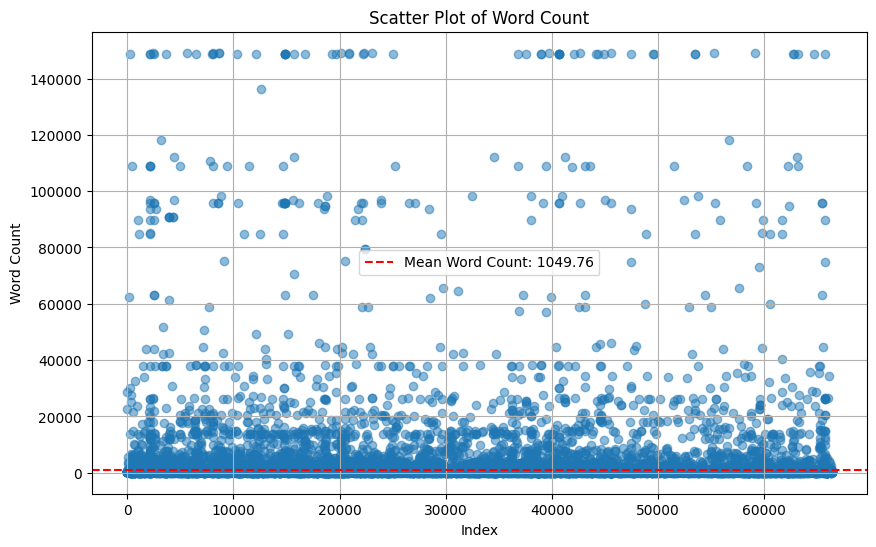

In [17]:
# Calculate the mean of the 'word_count' column
mean_word_count = lyrics['word_count'].mean()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting the scatter plot
plt.scatter(lyrics.index, lyrics['word_count'], alpha=0.5)

# Plotting the mean line
plt.axhline(y=mean_word_count, color='r', linestyle='--', label=f'Mean Word Count: {mean_word_count:.2f}')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Scatter Plot of Word Count')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Show plot
plt.show()


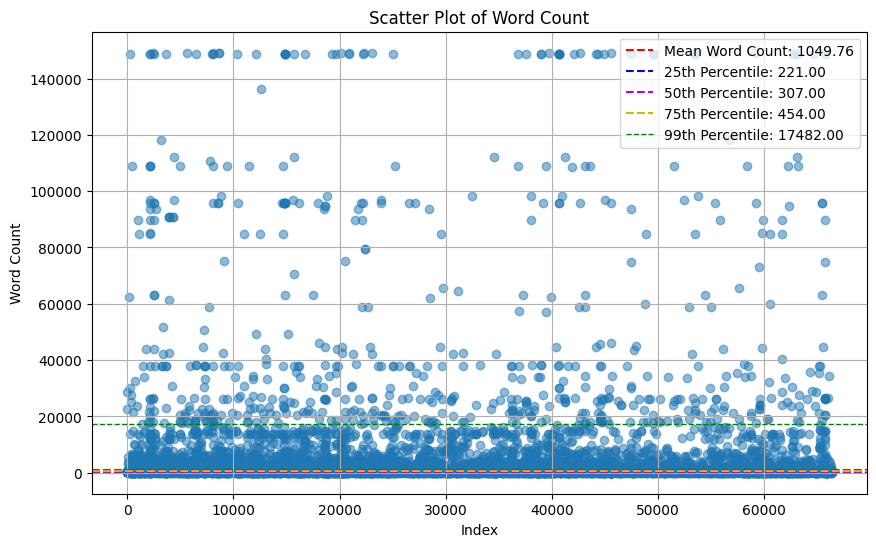

In [18]:
# Calculate the percentiles
percentile_25 = lyrics['word_count'].quantile(0.25)
percentile_50 = lyrics['word_count'].quantile(0.50)
percentile_75 = lyrics['word_count'].quantile(0.75)
percentile_99 = lyrics['word_count'].quantile(0.99)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting the scatter plot
plt.scatter(lyrics.index, lyrics['word_count'], alpha=0.5)

# Plotting the mean line
plt.axhline(y=mean_word_count, color='r', linestyle='--', label=f'Mean Word Count: {mean_word_count:.2f}')

# Plotting the percentiles lines
plt.axhline(y=percentile_25, color='b', linestyle='--', label=f'25th Percentile: {percentile_25:.2f}')
plt.axhline(y=percentile_50, color='m', linestyle='--', label=f'50th Percentile: {percentile_50:.2f}')
plt.axhline(y=percentile_75, color='y', linestyle='--', label=f'75th Percentile: {percentile_75:.2f}')
plt.axhline(y=percentile_99, color='g', linestyle='--', linewidth=1, label=f'99th Percentile: {percentile_99:.2f}')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Scatter Plot of Word Count')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Show plot
plt.show()


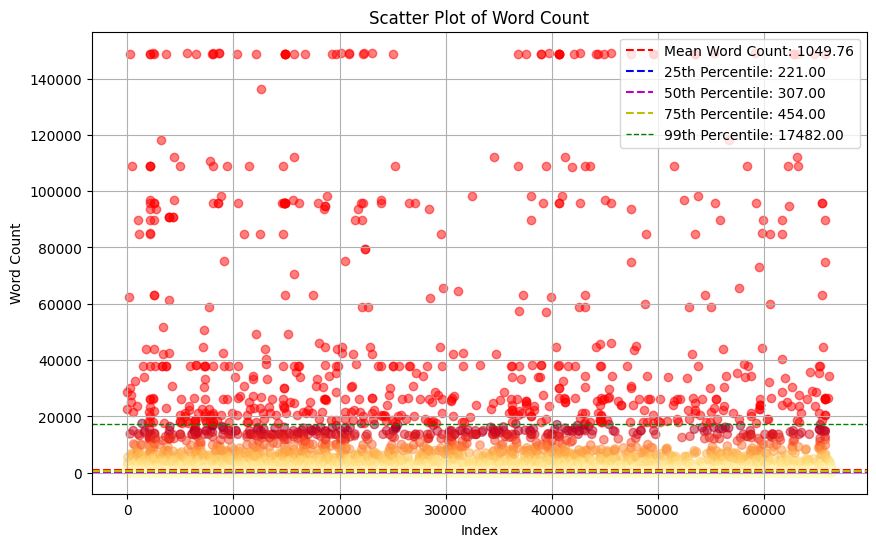

In [19]:
# Calculate the percentiles
percentile_25 = lyrics['word_count'].quantile(0.25)
percentile_50 = lyrics['word_count'].quantile(0.50)
percentile_75 = lyrics['word_count'].quantile(0.75)
percentile_99 = lyrics['word_count'].quantile(0.99)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting the scatter plot for points within the 99th percentile
plt.scatter(lyrics.index[lyrics['word_count'] <= percentile_99], 
            lyrics['word_count'][lyrics['word_count'] <= percentile_99], 
            c=lyrics['word_count'][lyrics['word_count'] <= percentile_99],
            cmap='YlOrRd', alpha=0.5)

# Plotting the scatter plot for points above the 99th percentile
plt.scatter(lyrics.index[lyrics['word_count'] > percentile_99], 
            lyrics['word_count'][lyrics['word_count'] > percentile_99], 
            color='r', alpha=0.5)

# Plotting the mean line
plt.axhline(y=mean_word_count, color='r', linestyle='--', label=f'Mean Word Count: {mean_word_count:.2f}')

# Plotting the percentile lines
plt.axhline(y=percentile_25, color='b', linestyle='--', label=f'25th Percentile: {percentile_25:.2f}')
plt.axhline(y=percentile_50, color='m', linestyle='--', label=f'50th Percentile: {percentile_50:.2f}')
plt.axhline(y=percentile_75, color='y', linestyle='--', label=f'75th Percentile: {percentile_75:.2f}')
plt.axhline(y=percentile_99, color='g', linestyle='--', linewidth=1, label=f'99th Percentile: {percentile_99:.2f}')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Scatter Plot of Word Count')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Show plot
plt.show()


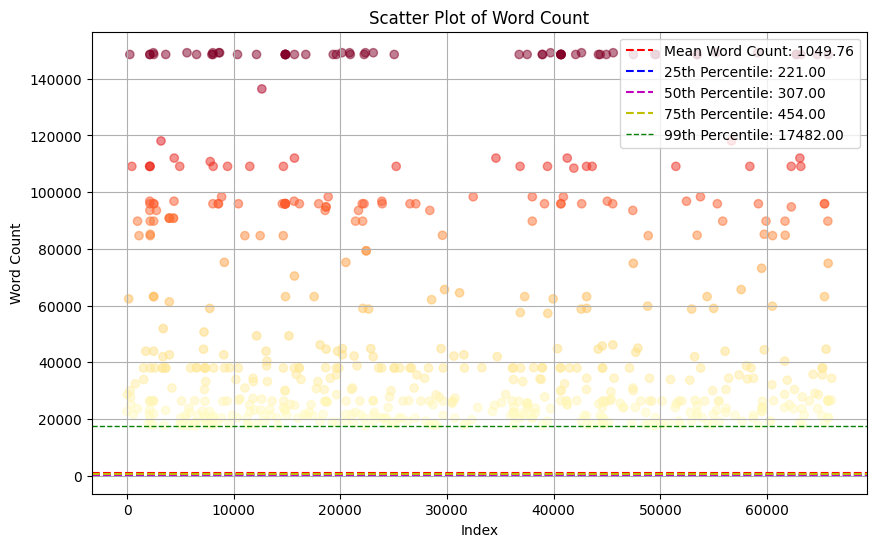

In [20]:
# Calculate the percentiles
percentile_25 = lyrics['word_count'].quantile(0.25)
percentile_50 = lyrics['word_count'].quantile(0.50)
percentile_75 = lyrics['word_count'].quantile(0.75)
percentile_99 = lyrics['word_count'].quantile(0.99)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plotting the scatter plot for points above the 99th percentile
plt.scatter(lyrics.index[lyrics['word_count'] > percentile_99], 
            lyrics['word_count'][lyrics['word_count'] > percentile_99], 
            c=lyrics['word_count'][lyrics['word_count'] > percentile_99],
            cmap='YlOrRd', alpha=0.5)

# Plotting the mean line
plt.axhline(y=mean_word_count, color='r', linestyle='--', label=f'Mean Word Count: {mean_word_count:.2f}')

# Plotting the percentile lines
plt.axhline(y=percentile_25, color='b', linestyle='--', label=f'25th Percentile: {percentile_25:.2f}')
plt.axhline(y=percentile_50, color='m', linestyle='--', label=f'50th Percentile: {percentile_50:.2f}')
plt.axhline(y=percentile_75, color='y', linestyle='--', label=f'75th Percentile: {percentile_75:.2f}')
plt.axhline(y=percentile_99, color='g', linestyle='--', linewidth=1, label=f'99th Percentile: {percentile_99:.2f}')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.title('Scatter Plot of Word Count')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Show plot
plt.show()


In [21]:
# Counting the number of rows with a word count above the 99th percentile
above_99_percentile_count = (lyrics['word_count'] > percentile_99).sum()

print(f"Number of rows with a word count above the 99th percentile: {above_99_percentile_count}")


Number of rows with a word count above the 99th percentile: 624


In [22]:
lyrics[lyrics['word_count'] > 17482]['lyrics'].to_csv('data/test.csv')

In [23]:
lyrics['word_count'].describe()

count     62494.000000
mean       1049.759497
std        6788.374923
min           0.000000
25%         221.000000
50%         307.000000
75%         454.000000
max      149171.000000
Name: word_count, dtype: float64

### Drop all rows with a word count of 0
### Drop all rows > 99th percentile
### Limit word count to 2000 words - 75% percentile (or whatever border) for the rest

### Either drop rows over the 99th percentile
### Cut Word Count down to 17482 (which is the 99th percentile word count)

In [24]:
lyrics.shape

(62494, 5)

In [25]:
# Calculate the 99th percentile
percentile_99 = lyrics['word_count'].quantile(0.99)
print(percentile_99)

17482.0


In [26]:
# Drop rows with word count above the 99th percentile
lyrics = lyrics[lyrics['word_count'] <= percentile_99]

In [27]:
# Drop rows with word count of 0
lyrics = lyrics[lyrics['word_count'] > 1]

In [28]:
lyrics['word_count'].describe()

count    61868.000000
mean       524.720631
std       1260.792392
min          2.000000
25%        220.000000
50%        305.000000
75%        446.000000
max      17482.000000
Name: word_count, dtype: float64

In [29]:
percentile_95 = lyrics['word_count'].quantile(0.95)

In [30]:
# Define a function to truncate the lyrics
def truncate_lyrics(lyrics, word_count):
    # Split the lyrics into words
    words = lyrics.split()
    # Truncate the words to the desired length
    truncated_lyrics = ' '.join(words[:word_count])
    return truncated_lyrics


In [31]:
# Calculate the 95th percentile word count
word_count = int(lyrics['word_count'].quantile(0.95))
# Apply the function to each row of the lyrics column
lyrics['truncated_lyrics'] = lyrics['lyrics'].apply(truncate_lyrics, args=(word_count,))


In [32]:
lyrics['lyrics'] = lyrics['truncated_lyrics']

In [33]:
lyrics = lyrics.drop(columns=['word_count','artist_name','track_name', 'truncated_lyrics'])

In [34]:
lyrics.to_csv('data/lyrics.csv', index=False)